Data Preprocessing steps taken:
1. Inpute missing values with median values as there are outliers present 
2. Impute zero values with minimum non zero values for each column (EV columns only)
3. Detect outliers and impute outliers with median
4. Data normalization rescale data in range (-1,1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np


from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#fixed random seed for reproducibility 
np.random.seed(0)

In [12]:
# load dataset (input variables = X, output variables = Y)
df = pd.read_csv("RawTrainingData.csv")
print("Summary of dataframe:\n",df.describe())

Summary of dataframe:
        log_2FoldChange            ET  CoExpression           PCC  \
count     41986.000000  41986.000000  41986.000000  41986.000000   
mean          1.706304      1.386724      0.988687      0.776996   
std           3.406233      0.796948      0.105762      0.104445   
min          -8.700000      0.000000      0.000000      0.000000   
25%           0.000000      1.000000      1.000000      0.731095   
50%           2.300000      2.000000      1.000000      0.773611   
75%           4.100000      2.000000      1.000000      0.827413   
max          12.800000      2.000000      1.000000      0.998858   

                PPI  Root10DaysSeedling  Root14DaysSeedling  \
count  41986.000000        41842.000000        41842.000000   
mean       0.909779         1320.371921          657.110324   
std        0.286501         2336.680687         2786.315059   
min        0.000000            0.000000            0.000000   
25%        1.000000          120.899200          

In [13]:
#creating a list of EV column names
df_tobepreprocessed = df.drop(columns=["OsID", "ET","CoExpression","PPI","Class","Trait"])

#Find the missing values (NaN) in each column & total number of missing values (NaN) in the entire dataset
print("Number of missing values per column:")
print(df.isnull().sum())
print("Total number of missing values:",df.isnull().sum().sum())


#Replace NaN for all EV columns since the missing values only present in EV columns
#Replace missing values(NaN) in each column with its median since there are outliers present
for col in df_tobepreprocessed.columns: #loop through each column
    if df_tobepreprocessed[col].isnull().any(): #check if the column contains any missing values
        median = df_tobepreprocessed[col].median() #calculate its median and replace the missing values with median
        df_tobepreprocessed[col].fillna(median, inplace=True)

#checking after imputing NA with median
print("Number of missing values per column:")
print(df_tobepreprocessed.isnull().sum())

Number of missing values per column:
OsID                     0
log_2FoldChange          0
ET                       0
CoExpression             0
PCC                      0
PPI                      0
Root10DaysSeedling     144
Root14DaysSeedling     144
Root17DaysSeedling     144
Root21DaysSeedling     144
Root24DaysSeedling     144
Root35DaysSeedling     144
Root52DaysSeedling     144
Shoot3DaysSeedling     144
Shoot10DaysSeedling    144
Shoot14DaysSeedling    144
Shoot17DaysSeedling    144
Shoot21DaysSeedling    144
Shoot35DaysSeedling    144
Leaf21DaysSeedling     144
Leaf45DaysOldPlant     144
Class                    0
Trait                    0
dtype: int64
Total number of missing values: 2160
Number of missing values per column:
log_2FoldChange        0
PCC                    0
Root10DaysSeedling     0
Root14DaysSeedling     0
Root17DaysSeedling     0
Root21DaysSeedling     0
Root24DaysSeedling     0
Root35DaysSeedling     0
Root52DaysSeedling     0
Shoot3DaysSeedling     0
Shoot

In [14]:
#Replace zeros with minimum non-zero value for each EV column

#checking
print("Number of zeroes per column:")
print(df_tobepreprocessed.eq(0).sum(axis=0))


#define the range of EV columns 
EV_columns = df_tobepreprocessed.columns[2:18]

# Replace zeros with minimum non-zero value for each column
for colname in EV_columns:
    col = df_tobepreprocessed.loc[:, colname]
    min_non_zero = col[col > 0].min()
    col[col == 0] = min_non_zero
    df_tobepreprocessed.loc[:, colname] = col

#checking
print("Number of zeroes per column:")
print(df_tobepreprocessed.eq(0).sum(axis=0))


Number of zeroes per column:
log_2FoldChange         8354
PCC                      475
Root10DaysSeedling      1248
Root14DaysSeedling      4804
Root17DaysSeedling     10381
Root21DaysSeedling     12755
Root24DaysSeedling      9139
Root35DaysSeedling      2983
Root52DaysSeedling     19377
Shoot3DaysSeedling     13584
Shoot10DaysSeedling     4907
Shoot14DaysSeedling    16735
Shoot17DaysSeedling    20128
Shoot21DaysSeedling    16297
Shoot35DaysSeedling     7866
Leaf21DaysSeedling     16609
Leaf45DaysOldPlant      3053
dtype: int64
Number of zeroes per column:
log_2FoldChange        8354
PCC                     475
Root10DaysSeedling        0
Root14DaysSeedling        0
Root17DaysSeedling        0
Root21DaysSeedling        0
Root24DaysSeedling        0
Root35DaysSeedling        0
Root52DaysSeedling        0
Shoot3DaysSeedling        0
Shoot10DaysSeedling       0
Shoot14DaysSeedling       0
Shoot17DaysSeedling       0
Shoot21DaysSeedling       0
Shoot35DaysSeedling       0
Leaf21DaysSeedli

Detect outliers per column before handling
log_2FoldChange: [0. 0. 0. ... 0. 0. 0.]
PCC: [0.945049 0.92922  0.922328 ... 0.714166 0.701115 0.701115]
Root10DaysSeedling: [494.3064 494.3064 494.3064 ... 435.8568 435.8568 435.8568]
Root14DaysSeedling: [1324.7211 1324.7211 1324.7211 ... 1405.2035 1405.2035 1405.2035]
Root17DaysSeedling: [368.1264 368.1264 368.1264 ... 265.823  265.823  265.823 ]
Root21DaysSeedling: [294.8658 294.8658 294.8658 ... 344.9909 344.9909 344.9909]
Root24DaysSeedling: [301.0274 301.0274 301.0274 ... 452.102  452.102  452.102 ]
Root35DaysSeedling: [1232.5354 1232.5354 1232.5354 ... 1906.0208 1906.0208 1906.0208]
Root52DaysSeedling: [24.3951 24.3951 24.3951 ... 67.4659 67.4659 67.4659]
Shoot3DaysSeedling: [18.7394  18.7394  18.7394  ...  7.13217  7.13217  7.13217]
Shoot10DaysSeedling: [211.4125 211.4125 211.4125 ... 282.5813 282.5813 282.5813]
Shoot14DaysSeedling: [428.3828  428.3828  428.3828  ...  92.11358  92.11358  92.11358]
Shoot17DaysSeedling: [83.63    83.63 

Text(0.5, 0, 'Sample')

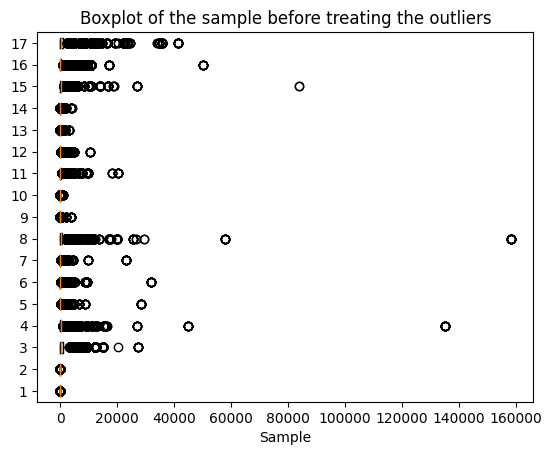

In [15]:
# Detecting outliers using IQR and replace with median value
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    # median = np.median(data)
    outliers = np.where((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR))[0]
    # data[outliers] = median
    return data

# Loop through each column of the dataframe and detect outliers
outlier_dict = {}
for col in df_tobepreprocessed.columns:
    outliers = np.array(detect_outliers_iqr(df_tobepreprocessed[col]))
    outlier_dict[col] = outliers

# Print the list of outliers for each column
print("Detect outliers per column before handling")
for col, outliers in outlier_dict.items():
    print(f"{col}: {outliers}")

plt.boxplot(df_tobepreprocessed.values, vert=False)
plt.title("Boxplot of the sample before treating the outliers")
plt.xlabel("Sample")

Detect outliers per column after handling
log_2FoldChange: 0        597.5872
1        597.5872
2        597.5872
3        597.5872
4        597.5872
           ...   
41981    484.1654
41982    484.1654
41983    484.1654
41984    484.1654
41985    484.1654
Name: Leaf45DaysOldPlant, Length: 41986, dtype: float64
PCC: 0        597.5872
1        597.5872
2        597.5872
3        597.5872
4        597.5872
           ...   
41981    484.1654
41982    484.1654
41983    484.1654
41984    484.1654
41985    484.1654
Name: Leaf45DaysOldPlant, Length: 41986, dtype: float64
Root10DaysSeedling: 0        597.5872
1        597.5872
2        597.5872
3        597.5872
4        597.5872
           ...   
41981    484.1654
41982    484.1654
41983    484.1654
41984    484.1654
41985    484.1654
Name: Leaf45DaysOldPlant, Length: 41986, dtype: float64
Root14DaysSeedling: 0        597.5872
1        597.5872
2        597.5872
3        597.5872
4        597.5872
           ...   
41981    484.1654
41982   

Text(0.5, 0, 'Sample')

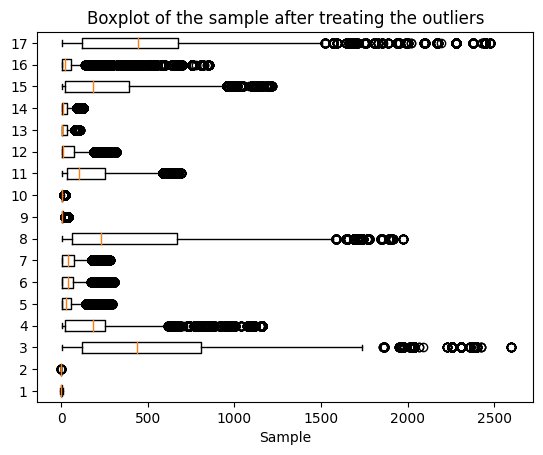

In [16]:
# Handle outliers using median imputation
def handle_outliers_median(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    median = np.median(data)
    outliers = np.where((data < Q1 - 1.5 * IQR) | (data > Q3 + 1.5 * IQR))[0]
    data[outliers] = median
    return data

# Loop through each column of the dataframe and handle outliers
for col in df_tobepreprocessed.columns:
    df_tobepreprocessed[col] = handle_outliers_median(df_tobepreprocessed[col])

#Checking whether the outliers are still present after handling
# Loop through each column of the dataframe and detect outliers
outlier_dict = {}
for col in df_tobepreprocessed.columns:
    outliers_after = detect_outliers_iqr(df_tobepreprocessed[col])
    outlier_dict[col] = outliers_after

# Print the list of outliers for each column
print("Detect outliers per column after handling")
for col, outliers in outlier_dict.items():
    print(f"{col}: {outliers_after}")

plt.boxplot(df_tobepreprocessed.values, vert=False)
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

C:\Users\chong\AppData\Local\Temp\ipykernel_3672\2749914687.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(original, ax=ax[0])
C:\Users\chong\AppData\Local\Temp\ipykernel_3672\2749914687.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normalized, ax=ax[1])


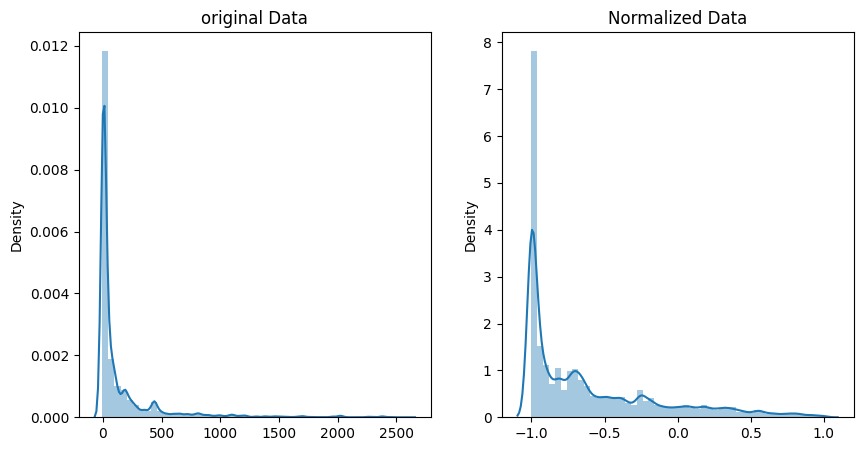

In [17]:
#Data normalization

# create scaler
scaler = MinMaxScaler(feature_range=(-1,1))

original = df_tobepreprocessed.values
normalized = scaler.fit_transform(df_tobepreprocessed)

# plot both together to compare
fig, ax=plt.subplots(1,2,figsize=(10, 5))

sns.distplot(original, ax=ax[0])
ax[0].set_title("original Data")

sns.distplot(normalized, ax=ax[1])
ax[1].set_title("Normalized Data")

normalzied_df_tobepreprocessed = pd.DataFrame(normalized, columns=['log_2FoldChange','PCC','Root10DaysSeedling','Root14DaysSeedling','Root17DaysSeedling','Root21DaysSeedling','Root24DaysSeedling','Root35DaysSeedling','Root52DaysSeedling','Shoot3DaysSeedling','Shoot10DaysSeedling','Shoot14DaysSeedling','Shoot17DaysSeedling','Shoot21DaysSeedling','Shoot35DaysSeedling','Leaf21DaysSeedling','Leaf45DaysOldPlant'])

In [18]:
# export the new training dataset to .csv file

# Select the columns in df that need to be modified using normalzied_df_tobepreprocessed
cols_to_modify = ['log_2FoldChange','PCC','Root10DaysSeedling','Root14DaysSeedling','Root17DaysSeedling','Root21DaysSeedling','Root24DaysSeedling','Root35DaysSeedling','Root52DaysSeedling','Shoot3DaysSeedling','Shoot10DaysSeedling','Shoot14DaysSeedling','Shoot17DaysSeedling','Shoot21DaysSeedling','Shoot35DaysSeedling','Leaf21DaysSeedling','Leaf45DaysOldPlant']

# Loop through the columns and modify the values in df
for col in cols_to_modify:
    df[col] = normalzied_df_tobepreprocessed[col]

# Save the modified df as a new csv file
df.to_csv('TrainingData.csv', index=False)

print("Summary of new dataframe:\n",df.describe())

Summary of new dataframe:
        log_2FoldChange            ET  CoExpression           PCC  \
count     41986.000000  41986.000000  41986.000000  41986.000000   
mean         -0.040210      1.386724      0.988687     -0.365709   
std           0.389447      0.796948      0.105762      0.462418   
min          -1.000000      0.000000      0.000000     -1.000000   
25%          -0.251534      1.000000      1.000000     -0.750074   
50%           0.030675      2.000000      1.000000     -0.449089   
75%           0.251534      2.000000      1.000000     -0.055126   
max           1.000000      2.000000      1.000000      1.000000   

                PPI  Root10DaysSeedling  Root14DaysSeedling  \
count  41986.000000        41986.000000        41986.000000   
mean       0.909779           -0.528399           -0.649336   
std        0.286501            0.497299            0.394380   
min        0.000000           -1.000000           -1.000000   
25%        1.000000           -0.908695      